<a href="https://colab.research.google.com/github/Dileep2896/Deep-Learning/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Number Plate Recognition

## Installing Dependencies

We will be using OpenCV, EasyOCR, Pytorch

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.7 kB/s 
     |████████████████████████████████| 8.8 MB 59.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


In [2]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 59 kB/s 
     |████████████████████████████████| 47.6 MB 84.3 MB/s 


## Importing libraries

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import easyocr
import imutils

## Reading Images, Grayscale and Blur

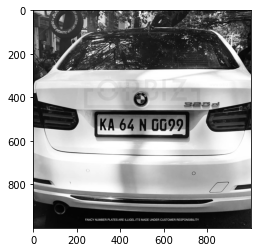

In [78]:
img = cv2.imread('car_1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## Applying Filtering and Edge Detection

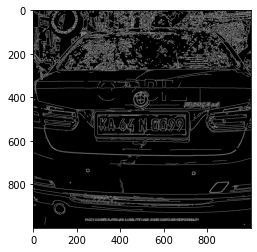

In [79]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) # Noice Reduction
edged = cv2.Canny(bfilter, 30, 10) # Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Find Contours and Apply mask

In [80]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10] 

In [81]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [82]:
location

array([[[295, 484]],

       [[298, 570]],

       [[699, 570]],

       [[696, 480]]], dtype=int32)

In [83]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)

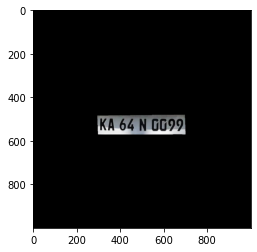

In [84]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [85]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

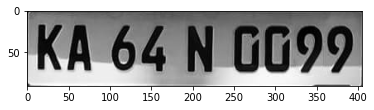

In [86]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## Using EasyOCR to extract Text

In [87]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 5], [405, 5], [405, 90], [3, 90]], 'KA 64 N 0099', 0.543025591348414)]

## Render Result

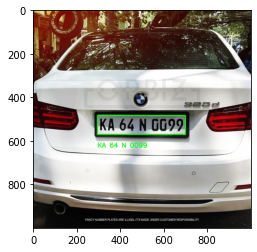

In [88]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 2, lineType = cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [89]:
text

'KA 64 N 0099'